In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating project at `~/Documents/eth_courses/notebooks/control/invariance`


In [14]:
using JuMP

using SCS
using SetProg
import GLPK

import CSDP
using Polyhedra


In [20]:
A = [1 1; 0 1] - [1; 1] * [1.17 1.03]
Wv = vrep([[x, y] for x in [-1.0, 1.0] for y in [-1.0, 1.0]])

V-representation Polyhedra.PointsHull{Float64, Vector{Float64}, Int64}:
4-element iterator of Vector{Float64}:
 [-1.0, -1.0]
 [-1.0, 1.0]
 [1.0, -1.0]
 [1.0, 1.0]

In [21]:
lib = DefaultLibrary{Float64}(GLPK.Optimizer)
W = polyhedron(Wv, lib)

Polyhedron DefaultPolyhedron{Float64, Polyhedra.Intersection{Float64, Vector{Float64}, Int64}, Polyhedra.Hull{Float64, Vector{Float64}, Int64}}:
4-element iterator of Vector{Float64}:
 [-1.0, -1.0]
 [-1.0, 1.0]
 [1.0, -1.0]
 [1.0, 1.0]

In [22]:
function Fs(s::Integer, verbose=1)
    @assert s ≥ 1
    F = W
    A_W = W
    for i in 1:(s-1)
        A_W = A * A_W
        F += A_W
        if verbose ≥ 1
            println("Number of points after adding A^$i * W: ", npoints(F))
        end
        removevredundancy!(F)
        if verbose ≥ 1
            println("Number of points after removing redundant ones: ", npoints(F))
        end
    end
    return F
end

Fs (generic function with 2 methods)

In [23]:
@time Fs(4)

Number of points after adding A^1 * W: 16
Number of points after removing redundant ones: 8
Number of points after adding A^2 * W: 32
Number of points after removing redundant ones: 12
Number of points after adding A^3 * W: 48
Number of points after removing redundant ones: 16
  3.417815 seconds (3.47 M allocations: 232.139 MiB, 3.36% gc time, 99.61% compilation time)


Polyhedron DefaultPolyhedron{Float64, Polyhedra.Intersection{Float64, Vector{Float64}, Int64}, Polyhedra.Hull{Float64, Vector{Float64}, Int64}}:
16-element iterator of Vector{Float64}:
 [-1.29, -2.56]
 [-1.29, -0.5599999999999999]
 [-0.9500000000000002, 1.7799999999999996]
 [-0.9380000000000002, 1.8519999999999996]
 [-0.9022000000000001, 2.0157999999999996]
 [-0.8980000000000001, 2.0319999999999996]
 [-0.77, 2.4999999999999996]
 [-0.71, 2.56]
 [1.29, 2.56]
 [1.29, 0.5599999999999999]
 [0.9500000000000002, -1.7799999999999996]
 [0.9380000000000002, -1.8519999999999996]
 [0.9022000000000001, -2.0157999999999996]
 [0.8980000000000001, -2.0319999999999996]
 [0.77, -2.4999999999999996]
 [0.71, -2.56]

In [28]:
using Plots
plot()
for i in 10:-1:1
    plot!(Fs(i, 0))
end

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


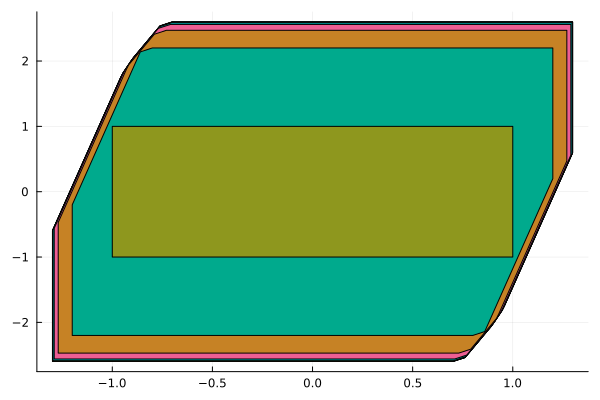

In [29]:
plot!()